# Predicting Heart Disease with Standard Machine Learning Models

Author: Davin Huynh

Course Project, UC Irvine, Math 10, Fall 24

I would like to post my notebook on the course's website. **Yes**

## Introduction 

Heart disease is a medical condition that affects the heart and blood vessels. It is one of the leading causes of death worldwide. As such, there is a great deal of research put into heart disease, espicially in predicting its presence. In this project, we will analyze a heart disease dataset from Kaggle and make predictions.  

## The Dataset and Visualization 

The dataset that we will be looking at is taken from Kaggle [here](<https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data>). Accordingly, the dataset dates from 1988 and consists of four databases from Cleveland, Hungary, Switzerland, and Long Beach. The original dataset contained 76 attributes, including the predicted attribute. However, some features are personal and are not meant for the public view. Hence, only 14 features will be considered in predicted heart disease. We now import the dataset.

In [1]:
# import useful tools 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

df = pd.read_csv('heart.csv') 
df 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


The dataset contains the following features: 

1. `age`. Integer values representing the patient's age in years, ranging from 20 to 80. 
2. `sex`. Binary values representing patient's sex (0 is female, 1 is male). 
3. `cp`.* Integer values from 0 to 3, inclusive, representing chest pain type (0 if typical angina, 1 if atypical angina, 2 if non-anginal pain, 3 if asymptomatic). 
4. `trestbps`. Integer values of resting blood pressure (in mmHg on admission to hospital). 
5. `chol`. Integer values for serum cholesterol in $\mathrm{mg}/\mathrm{dl}$. 
6. `fbs`. Binary values representing whether the patient's fasting blood sugar is greater 120 $\mathrm{mg}/\mathrm{dl}$ (1 if true, 0 if false). 
7. `restecg`.* Integer values from 0 to 2, inclusive, representing resting electrocardiographic results (0 if normal, 1 if ST-T wave abnormality, 2 if likely left ventricular hypertrophy).  
8. `thalach`. Integer values representing the patient's maximum heart rate achieved. 
9. `exang`. Binary values representing whether the patient's exercise induced angina or insufficient blood flow during physical activity (1 if yes, 0 if no). 
10. `oldpeak`. Values up to 1 decimal place representing the patient's ST depression induced by exercise relative to rest. 
11. `slope`.* Integer values from 0 to 2, inclusive, representing the slope of the peak exercise ST segment (0 if upsloping, 1 if flat, 2 if downsloping).  
12. `ca`. Integer values from 0 to 3, inclusive, representing the number of major vessels colored by flourosopy. 
13. `thal`. Integer values representing thallium stress test results (0 if normal, 1 if fixed defect, 2 if reversable defect). 
14. `target`. Binary values representing whether patient has heart disease (0 if false, 1 if true). 

The original dataset from Kaggle does not explain the meaning some of the categorical variables, ex. `restecg`. **Please note** that for the sake of interpretation, I assigned meaning to these categorical variables and are marked with (*). For the remainder of this project, I will interpret the features as numbers. 

With these features in mind, it is helpful to gain an idea of their importance in predicting heart disease. More specifically, we will visualize their relationships with the presence of heart disease. 

Let us start by plotting the numerical features `age`, `trestbps`, `chol`, `thalach`, and `oldpeak` against `target`. Recall that `target=1` means the patient has heart disease. 

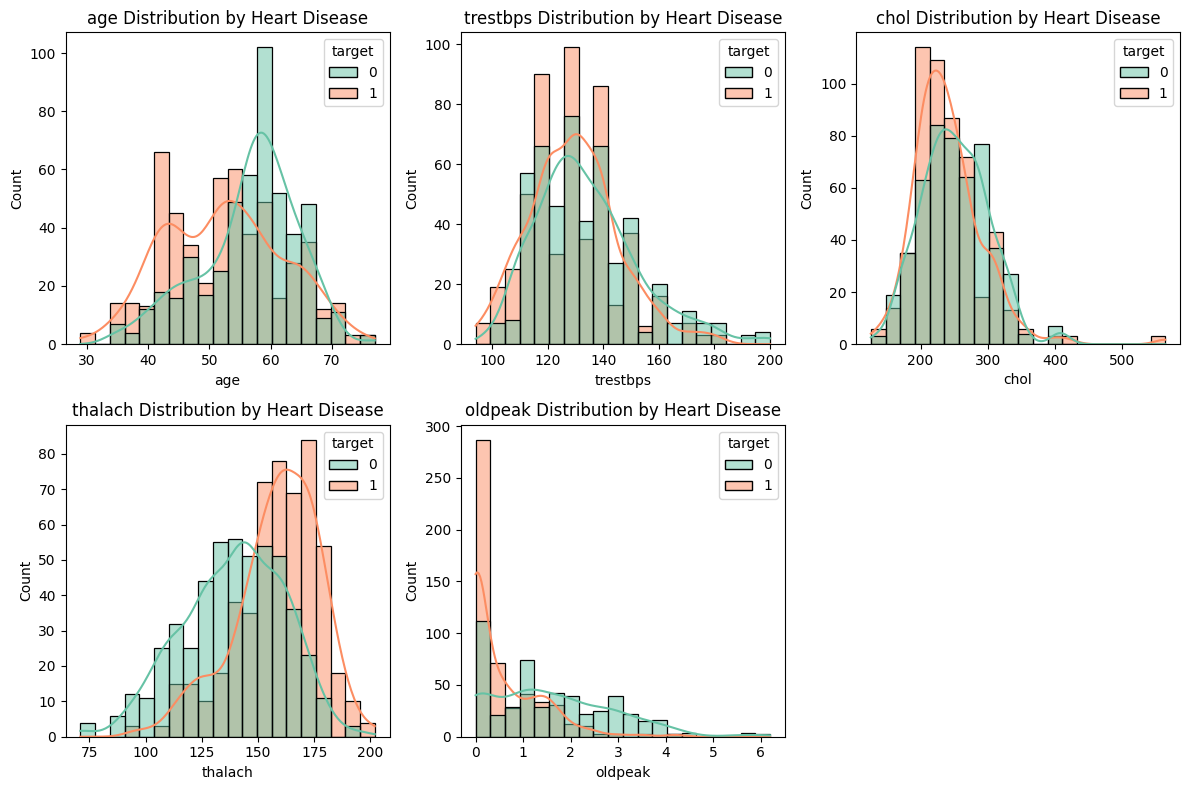

In [2]:
# numerical features we want to analyze 
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features): # i is index from 0 to 4
    plt.subplot(2, 3, i + 1) # 2 by 3 subplots at index i + 1
    sns.histplot(data=df, x=feature, hue='target', kde=True, bins=20, palette='Set2') 
    plt.title(f'{feature} Distribution by Heart Disease')
plt.tight_layout() 
plt.show() 

We can make few guesses from these plots. 
- Heart disease is more prevalent in younger patients. 
- Patients with higher maximum heart rates, described in `thalach`, tend to have heart disease. 
- Low ST depressions in `oldpeak` are likely to have heart disease. 

Moving forward, we visualize the relationship between the categorical features `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, and `thal` against heart disease. 

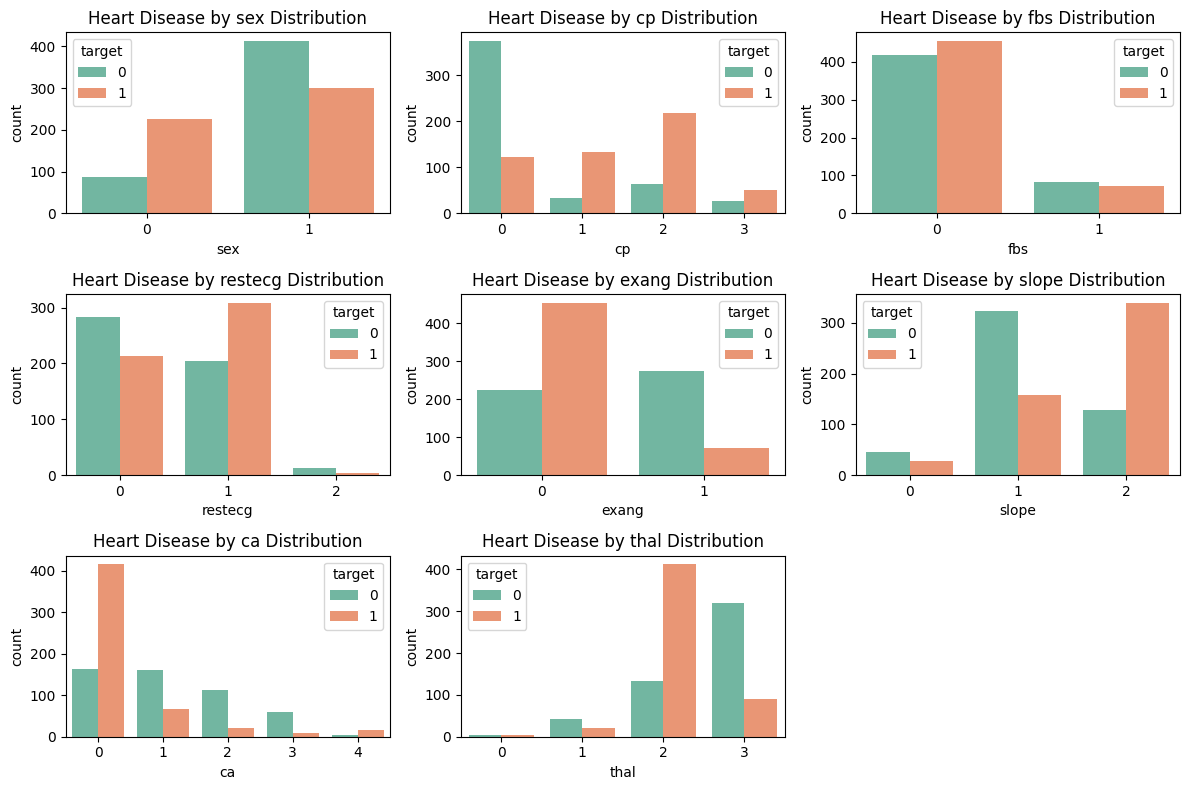

In [3]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(categorical_features): # i is index 
    plt.subplot(3, 3, i + 1) # 2 by 3 subplots at index i + 1
    sns.countplot(data=df, x=feature, hue='target', palette='Set2') 
    plt.title(f'Heart Disease by {feature} Distribution')
plt.tight_layout() 
plt.show()

Let us again make few observations from these plots. 
- In proportion, women are more at risk for heart disease. 
- Patients with nonzero chest pains in `cp` are likely to have heart disease. 
- Patients with no exercise-induced angina in `exang` are likely to have heart disease. 
- A `slope` value of 2, `ca` value of 0, and `thal` value of 2 are prone to heart disease. 

To conclude our visualization, we finish by plotting a pairwise scatter plot to spot potential bivariate relations. 

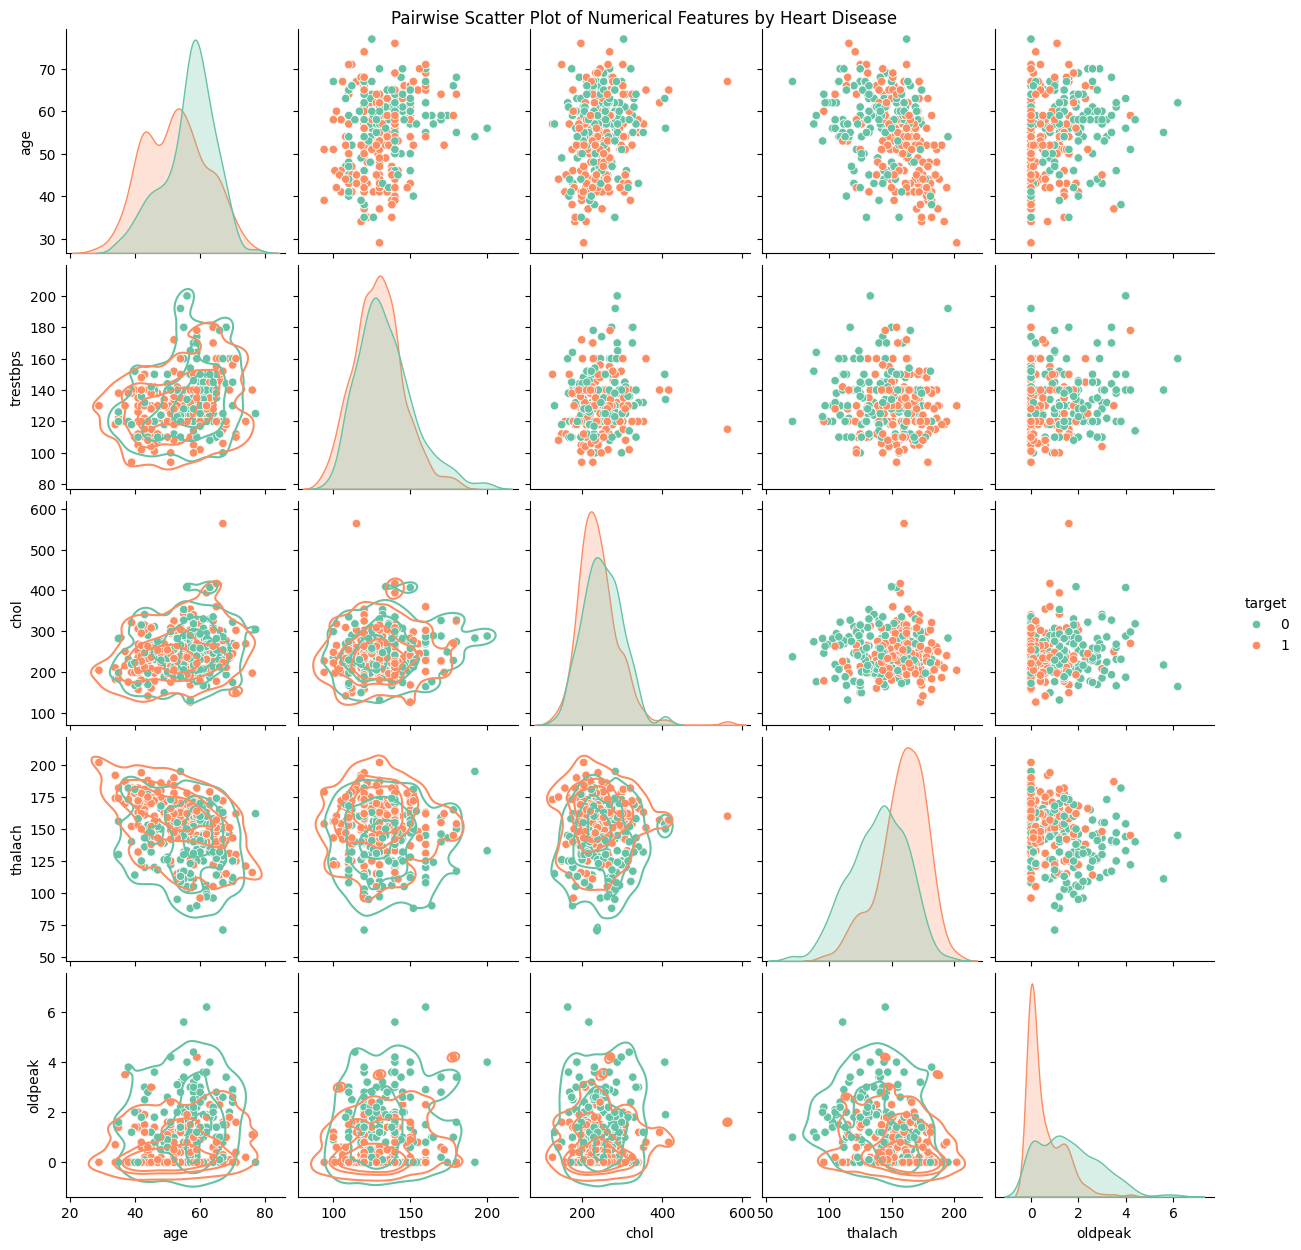

In [4]:
sns.pairplot(df[numerical_features + ['target']], 
    diag_kind='kde', 
    hue='target', 
    palette='Set2' 
    ).map_lower(sns.kdeplot, levels=4, color=".2") 
plt.suptitle('Pairwise Scatter Plot of Numerical Features by Heart Disease', y=1)
plt.show()

Informally interpretting the plots, we see no immediate correlation between two numerical features and heart disease prediction. Let us move on to the next section. 

## Preprocessing, Feature Scaling 
Before applying machine learning estimators, we should adhere to the standard practice of preprocessing our dataset. Raw data often contains noise, inconsistencies, and missing values which can lead to poor model performance. As such, preprocessing data aims to clean and give more structure to our data. 

Luckily, our dataset contains no missing values. For the sake of model performance, we will be checking for features that are highly correlated so as to detect potential **multicollinearity**. Intuitively, two features displaying multicollinearity are essentially measuring the same thing. This can make it challenging to interpret the relative importance of each feature and may even lead to model instability. To address this, we can visualize feature correlation by considering the **correlation matrix**. 

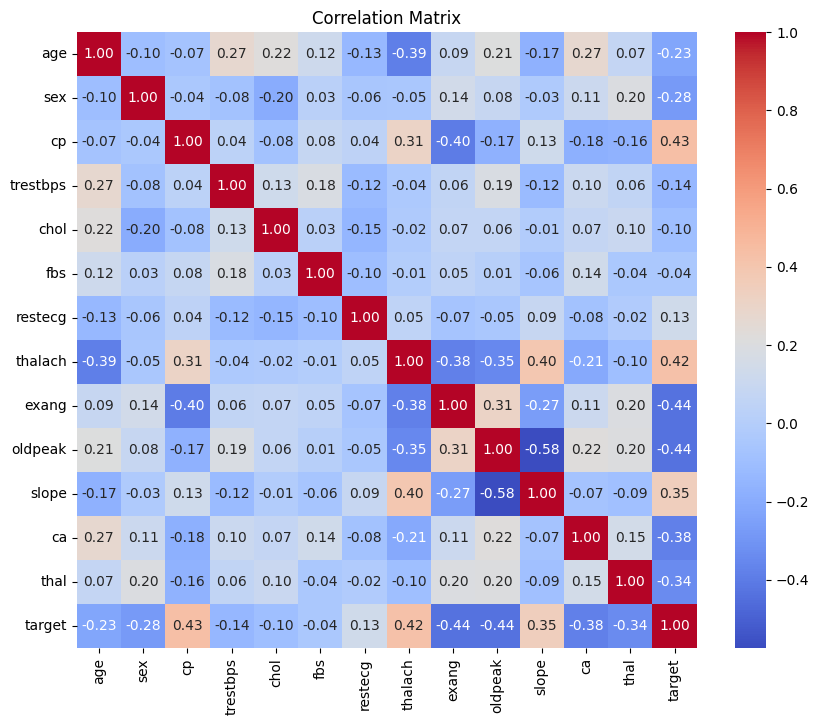

In [5]:
corr_matrix = df.corr() 
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

The conventional cutoff for strong correlation are values greater than `0.70` or less than `-0.70`. From the correlation matrix, we see that distinct features have no strong correlation. Hence, we will refrain from dropping any features. 

Some machine learning models, including those we will use in this project, are sensitive to the magnitude of features. To improve model performance, we will consider *scaling* our numerical features. In particular, we will analyze the features `age`, `trestbps`, `chol`, `thalach`, and `oldpeak`. First, let us visualize their histograms. 

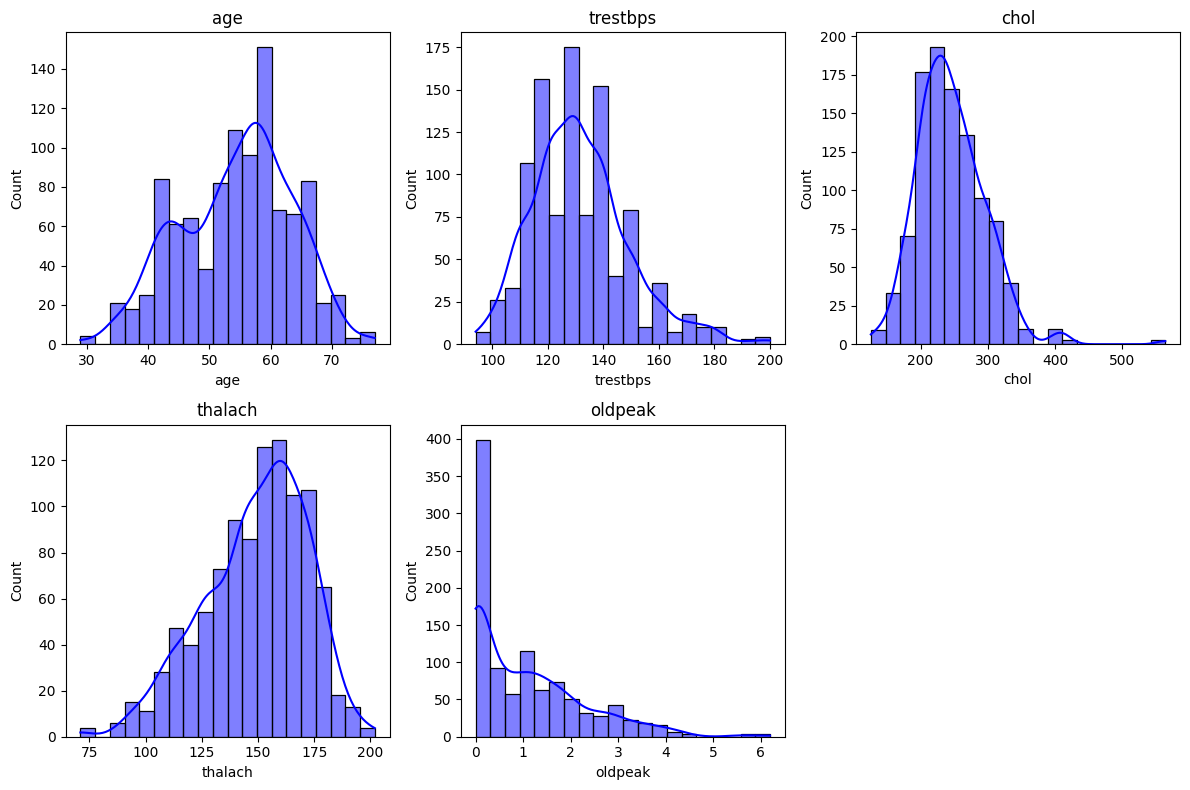

In [6]:
# numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] defined earlier 

# plotting histograms 
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features): # i is index 
    plt.subplot(2, 3, i + 1) # 2 by 3 subplots at index i + 1
    sns.histplot(df[feature], bins=20, kde=True, color='blue') 
    plt.title(feature) 
plt.tight_layout() 
plt.show() 

Based off the histograms, we find that `age` roughly follows a normal distribution, so we will apply `StandardScaler` to it. In other words, we will match the age values to  a standard normal distribution. 

On the contrary, the features `tresetbps`, `chol`, and `thalach`, and are slightly skewed whence `MinMaxScaler` will be used. 

The feature `oldpeak` has a strong positive skew, and so we will perform a logarithmic transformation on `oldpeak`. 

In [7]:
# import scaling packages 
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

features_st = ['age'] # to standardize 
features_m = ['trestbps', 'chol', 'thalach'] # to min-max scale 

df[features_st] = StandardScaler().fit_transform(df[features_st])
df[features_m] = MinMaxScaler().fit_transform(df[features_m]) 
df['oldpeak'] = np.log1p(df['oldpeak']) # log scale 

df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,0.292453,0.196347,0,1,0.740458,0,0.693147,2,2,3,0
1,-0.158157,1,0,0.433962,0.175799,1,0,0.641221,1,1.410987,0,0,3,0
2,1.716595,1,0,0.481132,0.109589,0,1,0.412214,1,1.280934,0,0,3,0
3,0.724079,1,0,0.509434,0.175799,0,1,0.687023,0,0.000000,2,1,3,0
4,0.834359,0,0,0.415094,0.383562,1,1,0.267176,0,1.064711,1,3,2,0
5,0.393241,0,0,0.056604,0.278539,0,0,0.389313,0,0.693147,1,0,2,1
6,0.393241,1,0,0.188679,0.438356,0,2,0.526718,0,1.686399,0,3,1,0
7,0.062402,1,0,0.622642,0.372146,0,0,0.564885,1,0.587787,1,1,3,0
8,-0.930114,1,0,0.245283,0.280822,0,0,0.557252,0,0.587787,2,0,3,0
9,-0.047877,1,0,0.264151,0.365297,0,0,0.343511,1,1.435085,1,2,2,0


## Training our Models

Our dataset has 1025 data points to consider. To train our models, we will split our data into training and testing sets using the conventional 80-20 split. Note that because we have many data points, we do not need to perform **Cross-Validation**. 

In [8]:
# splitting our data 
from sklearn.model_selection import train_test_split 

X = df.drop(columns=['target']) # features 
y = df['target'] # target, heart disease 

# split into 80% training and 20% testing 
# random state = 0 for reproducibility 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) 

We have now prepared our training and testing sets for our models to use. In the following sections, we will train and evaluate each model individually, but we will compare their performance at the end. 

### Logistic Regression and Evaluation 

Our binary classification task of predicting the presence of heart disease is a classic example for applying (binary) logistic regression ([User Guide](<https://scikit-learn.org/1.5/modules/linear_model.html#logistic-regression>) and [documentation](<https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html>)). We first initialize and fit the logistic regression model. 

In [9]:
# import logistic regression model 
from sklearn.linear_model import LogisticRegression 

# train logistic regression 
clf = LogisticRegression(max_iter=1000) # 1000 is the max num of iterations until regression converges 
clf.fit(X_train, y_train) 

# save prediction on test set to evaluate the model's perfomance later 
clf_y_test_pred = clf.predict(X_test)

Now that we have fit our logistic regression model in `clf`, we can evaluate its performance on the testing set. 
One may look at the **accuracy score** ([User Guide](<https://scikit-learn.org/1.5/modules/model_evaluation.html#accuracy-score>)) of the model which represents the *overall proportion* of correct predictions (closer to 1 is ideal). However, accuracy alone is insufficient, especially in critical applications like medical diagnoses where misdiagnoses can have serious consequences. For example, a person who is positive for heart disease may be incorrectly classified by our model, known as a false negative $\text{FN}$ test. To address this, we need additional metrics to quantify how frequently such errors occur.


More specifically, we want to analyze how well the model accurately predicts a given class (ex. positive for heart disease). We can do this by running a **classification report** ([User Guide](https://scikit-learn.org/1.5/modules/model_evaluation.html#classification-report)) on our logistic model and examining the values for `precision`, `recall`, and `f1-score`. I will briefly discuss what they measure. 

Let us focus on the case on the class of patients being positive for heart disease (`target = 1`). 
- To evaluate the model's `precision`, we calculate the proportion of true (and predicted) positive individuals to predicted positive individuals. Equivalently, `precision` answers the question: "How many predicted positive patients are truly positive?" The formula is 

$$ P_1 = \text{precision for positives} = \dfrac{\text{TP}}{\text{TP} + \text{FP}} $$

- The model's `recall` value answers a similar question: "How many truly positive patients were predicted correctly by the model?" That is, the value of `recall` is the proportion of predicted (and true) positive patients to true positive patients. The formula is 

$$ R_1 = \text{recall for positives} = \dfrac{\text{TP}}{\text{TP} + \text{FN}} $$

- The model's `f1-score` is the harmonic mean of precision and recall. Essentially, an `f1-score` close to 1 says that the model balances precision and recall well. The formula is 

$$ F_1 = \dfrac{2}{\frac{1}{P_1} + \frac{1}{R_1}} = \dfrac{2P_1 R_1}{P_1+R_1} $$ 

Evaluating the model's `precision`, `recall`, and `f1-score` for negative patients is analgous: 

$$ P_0 = \dfrac{\text{TN}}{\text{TN} + \text{FN}},\ R_0 = \dfrac{\text{TN}}{\text{TN} + \text{FP}},\ F_0 = \dfrac{2}{\frac{1}{P_0} + \frac{1}{R_0}} $$

Note that because our model is for binary classification (either you have or don't have heart disease), the values of $P_1$ and $R_0$ are known as **sensitivity** and **specificity**, respectively. Additionally, the number of $\text{TP}$ patients and the like are recorded in the model's **confusion matrix**, which is a nice visualization of the model's performance. 

Let us now run these metrics on our logistic model. 

Test Accuracy for Logistic Regression: 0.8195
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       100
           1       0.82      0.83      0.82       105

    accuracy                           0.82       205
   macro avg       0.82      0.82      0.82       205
weighted avg       0.82      0.82      0.82       205



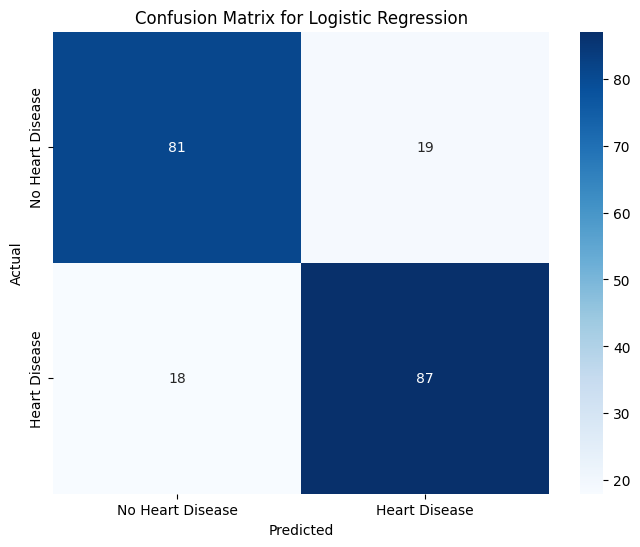

In [10]:
# import metrics 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

# printing accuracy and precision information 
print(f'Test Accuracy for Logistic Regression: {accuracy_score(y_test, clf_y_test_pred):.4f}') 

print('Classification Report for Logistic Regression:') 
print(classification_report(y_test, clf_y_test_pred)) 


# initialize confusion matrix 
clf_conf_matrix = confusion_matrix(y_test, clf_y_test_pred) 

# want to evaluate TP, FP, TN, FN 
# visualize confusion matrix with a heatmap 
plt.figure(figsize=(8, 6))
sns.heatmap(clf_conf_matrix, 
    annot=True, 
    fmt="d", 
    cmap="Blues", 
    xticklabels=["No Heart Disease", "Heart Disease"], 
    yticklabels=["No Heart Disease", "Heart Disease"])

plt.title("Confusion Matrix for Logistic Regression") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show() 

Many classifers, such as our logistic model, have built-in probability scores. In words, our logistic model assigns how likely a patient has heart disease. The cutoff is usually $50\%$, but we can vary this threshold. Varying the threshold certainly changes how many people are predicted positive or negative. Hence, we can calculate the model's true positive rate $\text{TPR}$ and false positive rate $\text{FPR}$ for each threshold. This brings us to the **ROC Curve**. 

Essentially, the ROC Curve visualizes the trade-off between $\text{TPR}$ and $\text{FPR}$ as our threshold varies from $100\%$ to $0\%$ (strict to lenient). Ideally, we want the model to correctly assess patients $100\%$ of the time, which corresponds to $\text{TPR}=1$ and $\text{FPR}=0$ at some threshold. Therefore, an ideal ROC Curve should "hug" the top-left corner $(0,1)$. As such, if we compare two ROC Curves of different models, the curve that is closer to the top-left corver (or steeper) is considered the better model. Here is the [User Guide](<https://scikit-learn.org/1.5/modules/model_evaluation.html#roc-metrics>). 

To numerically evaluate how "close" an ROC Curve is to the top-left corner, we can compute its **AUC Score**. The AUC Score of a ROC Curve is simply the area under the curve. Therefore, AUC Scores close to $1$ is ideal. 

Let us now visualize the ROC Curve of our logistic model along its AUC Score. 

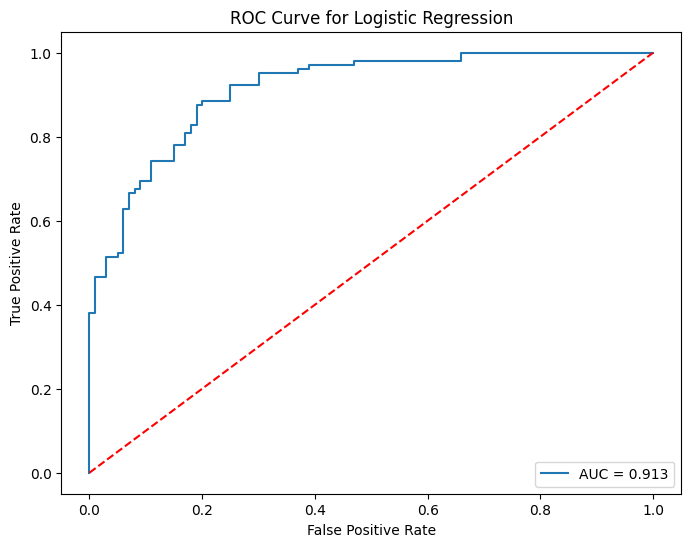

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score 

# get probabilities for the positive class 
clf_y_test_prob = clf.predict_proba(X_test)[:, 1] 

# calculate ROC curve 
fpr, tpr, thresholds = roc_curve(y_test, clf_y_test_prob) 

# plot ROC curve 
plt.figure(figsize=(8, 6)) 
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, clf_y_test_prob):.3f}') 
plt.plot([0, 1], [0, 1], 'r--')  # classifier line 
plt.title('ROC Curve for Logistic Regression') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc='lower right') 
plt.show() 

Before we conclude our evaluation on logistic regression, we should look at the coefficients to get a feel for which features are considered important. 

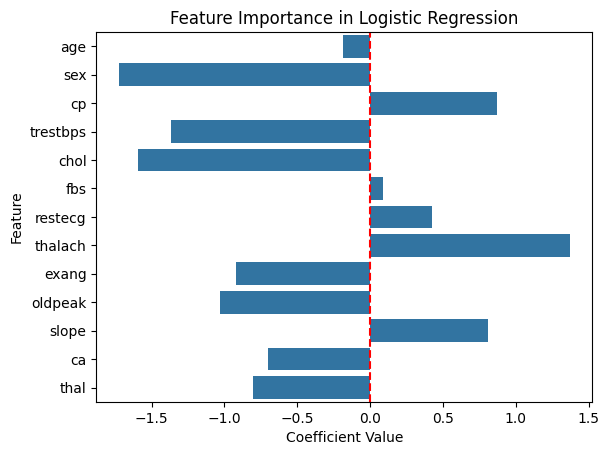

In [12]:
# extracting coefficients from our logistic regression model 
clf_coef = clf.coef_[0]

sns.barplot(x=clf_coef, y=X.columns) 
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(0, color='red', linestyle='--')  # line to show zero
plt.show()

Based on the magnitude of the coefficients, we find that `sex`, `trestbps`, `chol`, and `thalach` are the most important factors in predicting heart diease. Let us move forward to the next model. 

### Support Vector Machines and Evaluation

In short, support vector machines (SVM) aim to separate data points with a hyper-plane. Because SVMs work well in high-dimensional spaces, we are motivated to use SVMs for our classification task ([SVM User Guide](<https://scikit-learn.org/1.5/modules/svm.html#>) and [SVC documentation](<https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC>)).

Let us now initialize and train our model. We will start with linear classification `kernel='linear'`. 

In [13]:
# import SVM for classification from sklearn
from sklearn.svm import SVC 

# initialize 
svm = SVC(kernel='linear', C=1.0, probability=True) 

# training 
svm.fit(X_train, y_train) 

# predicting on test set 
svm_y_test_pred = svm.predict(X_test)

Now that we have our SVM model, we can evaluate its perfomance using the same metrics in our logistic regression model.  

Test Accuracy for Linear SVM: 0.844
Classification Report for Linear SVM:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       100
           1       0.83      0.88      0.85       105

    accuracy                           0.84       205
   macro avg       0.85      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205



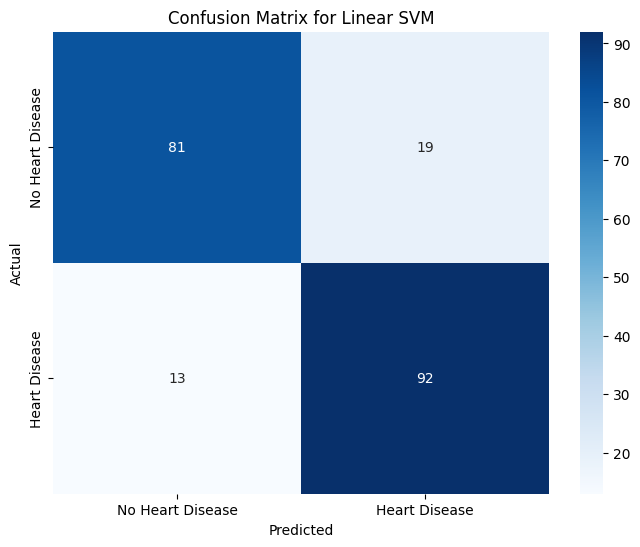

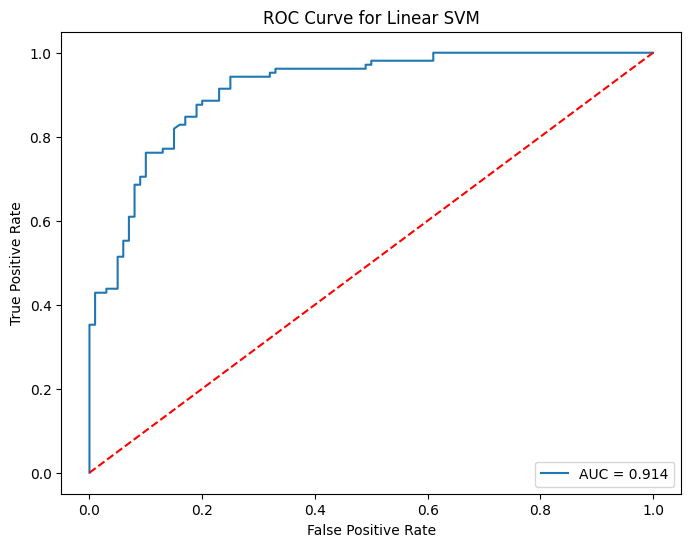

In [14]:
# printing accuracy and precision information for svm
print(f'Test Accuracy for Linear SVM: {accuracy_score(y_test, svm_y_test_pred):.3f}') 

print('Classification Report for Linear SVM:') 
print(classification_report(y_test, svm_y_test_pred)) 


# initialize confusion matrix for linear svm
svm_conf_matrix = confusion_matrix(y_test, svm_y_test_pred) 

# visualize confusion matrix for linear svm with a heatmap 
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, 
    annot=True, 
    fmt="d", 
    cmap="Blues", 
    xticklabels=["No Heart Disease", "Heart Disease"], 
    yticklabels=["No Heart Disease", "Heart Disease"])

plt.title("Confusion Matrix for Linear SVM") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show() 


# get probabilities for the positive class 
svm_y_test_prob = svm.predict_proba(X_test)[:, 1] 

# calculate ROC curve 
fpr, tpr, thresholds = roc_curve(y_test, svm_y_test_prob) 

# plot ROC curve 
plt.figure(figsize=(8, 6)) 
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, svm_y_test_prob):.3f}') 
plt.plot([0, 1], [0, 1], 'r--') # classifier line 
plt.title('ROC Curve for Linear SVM') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc='lower right') 
plt.show() 

Because our decision boundary is linear, we visualize its feature importance as we did with logistic regression. 

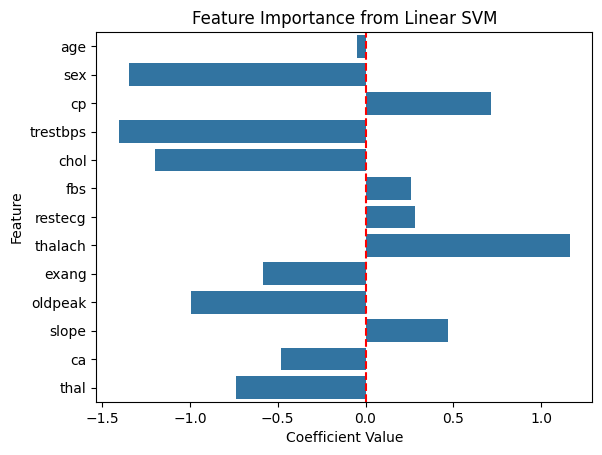

In [15]:
# extracting the svm decision boundary coefficients
svm_coef = svm.coef_[0]

# bar plot of svm coefficients
sns.barplot(x=svm_coef, y=X.columns) 
plt.title('Feature Importance from Linear SVM')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(0, color='red', linestyle='--') # line to show zero
plt.show()

According to our linear SVM model, `sex`, `trestbps`, `chol`, and `thalach` are relatively more important compared to the other features. Unsuprisingly, our logistic regression model also predicted this as both models assumed linear kernels. 

**Extra.** To explore the usage of SVMs further, we can optimize the hyperparameters by using a **Grid Search** ([User Guide](<https://scikit-learn.org/dev/modules/grid_search.html#grid-search>) and [documentation](<https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html>)). Essentially, we specify which parameters we want to optimize and perform an exhaustive search. We will compare the hyperparameter performance using the standard accuracy score (proportion of correctly predicted to all samples). The hyperparameters we will vary are the regularization `C`, kernel type `kernel`, and kernel coefficient `gamma` parameters. Please refer to the [User Guide](<https://scikit-learn.org/1.5/modules/svm.html#svm-kernels>) for the mathematical formulation of the kernel functions. Note that we are performing tuning hyperparameters for curiosity, but further investigation should address overfitting.  

In [16]:
from sklearn.model_selection import GridSearchCV

# define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'] # for 'rbf' and 'poly'
}

# set up the grid search on SVC with 5 cross-fold validations 
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# reporting best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_svm = grid_search.best_estimator_ 


# testing
best_svm_y_test_pred = best_svm.predict(X_test) 

# printing accuracy and precision information for svm
print(f'Test Accuracy for Tuned SVM: {accuracy_score(y_test, best_svm_y_test_pred):.4f}') 

print('Classification Report for Tuned SVM:') 
print(classification_report(y_test, best_svm_y_test_pred)) 

Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Test Accuracy for Tuned SVM: 0.9756
Classification Report for Tuned SVM:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       100
           1       0.98      0.97      0.98       105

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



As expected, our hyperparameter tuning yielded a much better performance for our SVM model. In particular, a radial decision boundary performed better than a linear one. We should again note that overfitting is a potential issue with our optimized hyperparameters, but since this is just an exploration, I will leave it here and move on to our final model. 

### Nearest Neighbors Classification and Evaluation 
The last model we will use is the **Nearest Neighbors Classification** or **kNN Classification** ([User Guide](<https://scikit-learn.org/dev/modules/neighbors.html#classification#>) and [documentation](<https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier>)). The idea of the Nearest Neighbors model is to consider $k$ of the "closest" data points from a given point and predicting a label. We should note that there are different notions of "distance" ([list](<https://scikit-learn.org/dev/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics>)) between data points. Furthermore, the kNN model depends on our choice of $k$ and that the corresponding optimal choice of $k$ is heavily dependant on our data. This brings us to the **bias-variance trade off**. 

The bias-variance trade off compares the model's ability to generalize (bias) and its sensitivity to new data (variance). Intuitively, a model with high bias tends to underfit whereas a model with high variance tends to overfit. This trade off is very apparent with the kNN model as we vary the number of neighbors, $k$. 
- When $k$ is very large, the kNN model essentially averages the whole dataset and oversimplifies (high bias), leading to underfitting. But because $k$ is very large, the model is less sensitive to new data (low variance). 
- Conversely, if $k$ is very small, then new data points have much more influence (high variance). But considering very few neighbors allows more generalization (low bias).

We would like to minimize bias and variance error as much as possible. But first, we should get a feel for our kNN model. We will first initialize and fit our model using the standard $k=5$ neighbors and the conventional Euclidean metric, which corresponds to `metric='minkowski'` and `p=2`. We follow up with its accuracy and classification report. 

In [17]:
# importing kNN classifier 
from sklearn.neighbors import KNeighborsClassifier

# initialize 
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) 

# training 
knn.fit(X_train, y_train) 

# record predictions 
knn_y_pred = knn.predict(X_test) 


# accuracy for k=7
accuracy = accuracy_score(y_test, knn_y_pred)
print(f"Accuracy of kNN at k=5: {accuracy:.4f}")

# classification report for k=7
print("Classification Report of kNN at k=5:")
print(classification_report(y_test, knn_y_pred))

Accuracy of kNN at k=5: 0.8780
Classification Report of kNN at k=5:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       100
           1       0.88      0.88      0.88       105

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



Our kNN Classifer model performs well for an initial guess of $k=5$ neighbors. Other $k$ values may perform better, and we can visualize their corresponding performance by plotting the model's training and testing accuracy against each $k$ value. In particular, we will range $k$ from $1$ to $50$. 

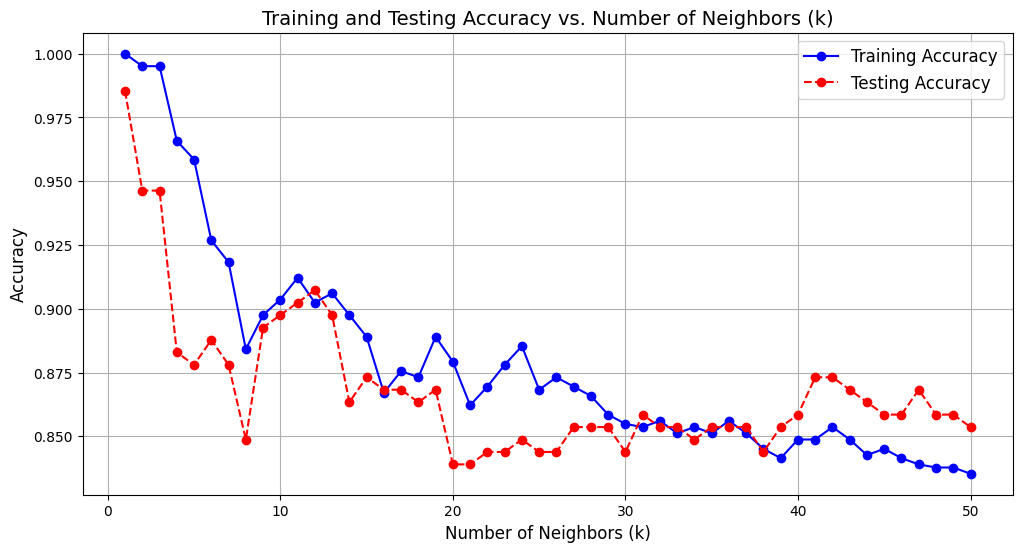

In [18]:
# range of k values
k_values = range(1, 51)

# initialize lists to store accuracy scores
knn_train_accuracies = []
knn_test_accuracies = []

# go through each k value
for k in k_values:
    # initialize the kNN model with specified hyperparameters
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    
    # fit model on training set
    knn.fit(X_train, y_train)
    
    # evaluate accuracy on the training and testing sets
    knn_y_train_pred = knn.predict(X_train)
    knn_train_accuracy = accuracy_score(y_train, knn_y_train_pred)
    knn_train_accuracies.append(knn_train_accuracy)
    
    knn_y_test_pred = knn.predict(X_test)
    knn_test_accuracy = accuracy_score(y_test, knn_y_test_pred)
    knn_test_accuracies.append(knn_test_accuracy)

# plot the results
plt.figure(figsize=(12, 6))
plt.plot(k_values, knn_train_accuracies, label='Training Accuracy', marker='o', linestyle='-', color='blue')
plt.plot(k_values, knn_test_accuracies, label='Testing Accuracy', marker='o', linestyle='--', color='red')
plt.title('Training and Testing Accuracy vs. Number of Neighbors (k)', fontsize=14)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()

As discussed before, the kNN classifer is prone to overfitting as seen by the graph above where the highest testing accuracy corresponds to only $k=1$ neighbor. It is more likely to be the case that having more neighbors, coupled with decent training and testing accuracy, has more generalization ability. As such, $k=11$ or $k=12$ neighbors serve as great candidates for our model. 

Let us take $k=11$ neighbors and run our metrics. 

Accuracy of kNN at k=11: 0.9024
Classification Report of kNN at k=11:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       100
           1       0.89      0.92      0.91       105

    accuracy                           0.90       205
   macro avg       0.90      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205



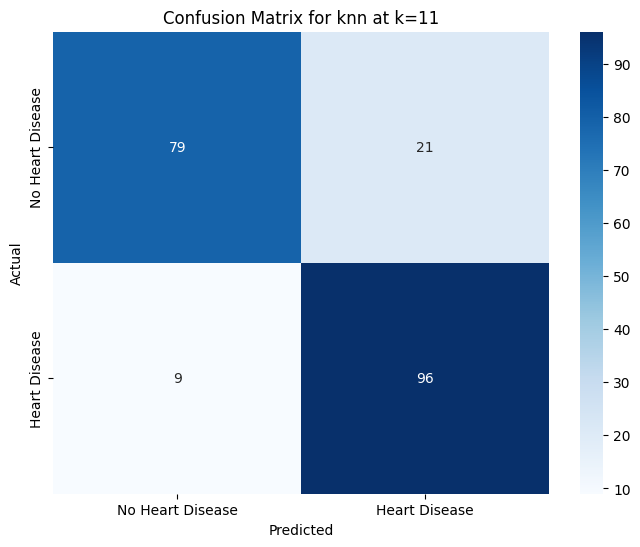

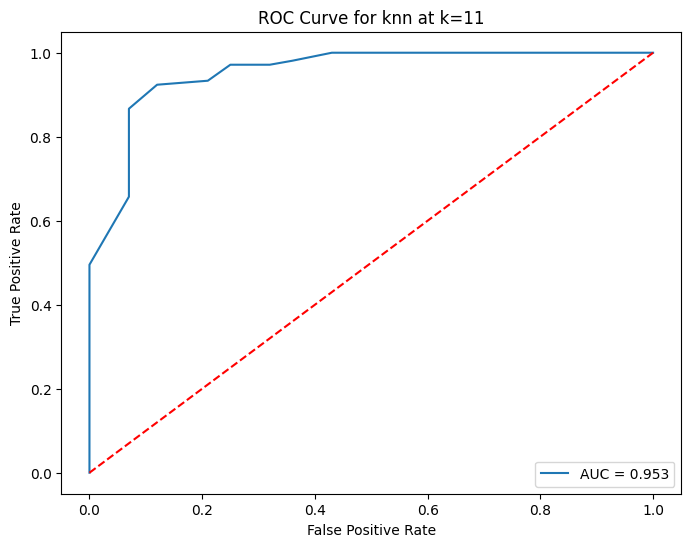

In [19]:
# importing kNN classifier 
from sklearn.neighbors import KNeighborsClassifier

# initialize 
knn = KNeighborsClassifier(n_neighbors=11, metric='minkowski', p=2) 

# training 
knn.fit(X_train, y_train) 

# record predictions 
knn_y_pred = knn.predict(X_test) 


# accuracy for k=11
accuracy = accuracy_score(y_test, knn_y_pred)
print(f"Accuracy of kNN at k=11: {accuracy:.4f}")

# classification report for k=11
print("Classification Report of kNN at k=11:")
print(classification_report(y_test, knn_y_pred)) 


# initialize confusion matrix for knn
knn_conf_matrix = confusion_matrix(y_test, knn_y_test_pred) 

# visualize confusion matrix for knn with a heatmap 
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, 
    annot=True, 
    fmt="d", 
    cmap="Blues", 
    xticklabels=["No Heart Disease", "Heart Disease"], 
    yticklabels=["No Heart Disease", "Heart Disease"])

plt.title("Confusion Matrix for knn at k=11") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show() 


# get probabilities for the positive class 
knn_y_test_prob = knn.predict_proba(X_test)[:, 1] 

# calculate ROC curve 
fpr, tpr, thresholds = roc_curve(y_test, knn_y_test_prob) 

# plot ROC curve 
plt.figure(figsize=(8, 6)) 
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, knn_y_test_prob):.3f}') 
plt.plot([0, 1], [0, 1], 'r--') # classifier line 
plt.title('ROC Curve for knn at k=11') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc='lower right') 
plt.show() 

**Extra.** As we did with our SVM model, we can perform hyperparameter tuning to optimize our kNN model's accuracy. 

In [20]:
param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# best parameters
print("Best Parameters:", grid_search.best_params_)
best_knn = grid_search.best_estimator_ 


# testing best knn
best_knn_y_test_pred = best_knn.predict(X_test)

# printing accuracy and precision information for knn
print(f'Test Accuracy for Tuned kNN: {accuracy_score(y_test, best_knn_y_test_pred):.3f}') 

print('Classification Report for Tuned kNN:') 
print(classification_report(y_test, best_knn_y_test_pred)) 

Best Parameters: {'metric': 'minkowski', 'n_neighbors': 6, 'weights': 'distance'}
Test Accuracy for Tuned kNN: 1.000
Classification Report for Tuned kNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



We obtain $100\%$ accuracy with these parameters. However, the issue of overfitting is clearly evident, though we won’t address it in detail since this is a small-scale exploration. 

## Conclusion  

In this project, we sought out to predict the presence or absence of heart disease from a dataset from Kaggle. This task is a binary classification problem. We began by making a few visualizations to give insight to our dataset. We then preprocessed our dataset, which included scaling numerical features and checking for multicollinearity. After that, we train and evaluated three models: logistic regression, SVM, and kNN. We now compare their performance by summarizating their metrics. Note that we will look at the precision and recall scores for the positive class. 

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

# initialize a dictionary to store results
results = {}

# define a function to evaluate and store metrics
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
    
    # store in results dictionary
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    }

# evaluate models 
evaluate_model("Logistic Regression", clf, X_test, y_test)
evaluate_model("SVM", svm, X_test, y_test)
evaluate_model("kNN", knn, X_test, y_test)

# display results
import pandas as pd
results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Logistic Regression,0.819512,0.820755,0.828571,0.824645,0.913238
SVM,0.843902,0.828829,0.876190,0.851852,0.913952
kNN,0.902439,0.889908,0.923810,0.906542,0.953143


Just looking at the scores, it is clear that kNN at $k=11$ outperformed logistic regression and SVM. Between logistic regression and SVM, we see that their AUC scores are similar. However, SVM preformed slightly better than logistic regression in `accuracy`, `recall`, and `f1-score`. Hence, kNN performs the best whereas logistic regression performed the worst. 

**Extra.** As an aside, both SVM and kNN performed much better after tuning their hyperparameters, with kNN achieving an accuracy score of $100\%$. 

## References

1. Dataset from Kaggle: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data. Accessed 24 Nov. 2024. 
2. Codes from Class Lecture Notes for Math 10 in Fall 2024 and ChatGPT. 
3. scikit-learn https://scikit-learn.org/1.5/index.html, specific pages linked throughout project. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=03440bca-b9a6-4222-8038-6ef9beaeb66d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>